# Utilizzo della libreria Pytesseract per estrarre le informazioni rilevanti dal retro della tessera sanitaria

In [1]:
from pytesseract import Output
from codicefiscale import codicefiscale
from datetime import datetime
import pytesseract
import argparse
import cv2

In [2]:
#pip install pytesseract
#pip install python-codicefiscale
#! pip install -U spacy

## Carico il retro della mia tessera sanitaria

In [10]:
image = cv2.imread(r'C:\Users\matti\Desktop\cf_retro_simo.jpg')
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = pytesseract.image_to_data(rgb, output_type=Output.DICT)

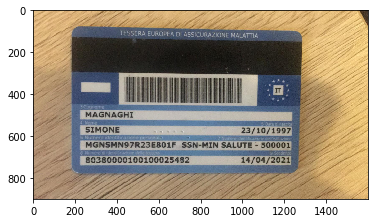

In [11]:
from matplotlib import pyplot as plt
plt.imshow(rgb, interpolation='nearest')

In [12]:
testo=results['text']
testo

['',
 '',
 '',
 '',
 '  ',
 ' ',
 '',
 '     ',
 '',
 '     ',
 '',
 '  ',
 '',
 '   ',
 '',
 '',
 '',
 '    ',
 '',
 '',
 '',
 '  ',
 '     ',
 '',
 '',
 '',
 'Ce',
 'sh',
 '_f',
 'a',
 'SGP',
 'pe',
 'fF',
 'gr',
 'ge',
 'fh,',
 'y',
 '',
 '',
 'ie',
 'it',
 'p44',
 'Se',
 'Ze',
 'Le,',
 'of',
 '“ME',
 'Z',
 'CA.',
 '-',
 'iy',
 'LEA',
 'A',
 '',
 'tdddiddidstipyipJd',
 'iiiedp',
 'ge',
 '8',
 'fe',
 'eS',
 '',
 '<',
 '5',
 'LG',
 'A',
 '',
 '',
 'fs',
 '',
 '',
 '‘TED',
 'HE',
 '|',
 '1',
 'IM)',
 '!',
 'Jes',
 '',
 '',
 'I',
 'LANA',
 'AN',
 'ME',
 'Z',
 '',
 '',
 'y',
 'WA',
 'a),',
 'Ge',
 '',
 'YZ',
 'MAGNAGHI',
 'Sy',
 '',
 '7',
 'SIMONE',
 '23/10/1997',
 'tio',
 '',
 '',
 'MGNSMN97R23E801F',
 'SSN-MIN',
 'SALUTE',
 '-',
 '500001',
 'Me',
 '',
 '',
 '-~',
 '%',
 '80380000100100025482',
 '14/04/2021']

In [6]:
lista=[]
for parola in testo:
    if len(parola) >=4 and  " " not in parola:
        lista.append(parola)

In [7]:
lista

['RIGIROLI',
 'MATTIA',
 '07/06/1997',
 'RGRMTT97HO7D912D',
 'SSN-MIN',
 'SALUTE',
 '500001',
 '80380000305036999300',
 '30/11/2021']

In [37]:
#lista

['tdddiddidstipyipJd',
 'iiiedp',
 '‘TED',
 'LANA',
 'MAGNAGHI',
 'SIMONE',
 '23/10/1997',
 'MGNSMN97R23E801F',
 'SSN-MIN',
 'SALUTE',
 '500001',
 '80380000100100025482',
 '14/04/2021']

In [8]:
len(testo[21])

20

In [9]:
testo[21]

'80380000305036999300'

In [8]:
now = datetime.now()
# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
dt_string

'05/07/2020 09:34:52'

In [9]:
codicefiscale.decode('MGNSMN97R23E801F')

{'code': 'MGNSMN97R23E801F',
 'omocodes': ['MGNSMN97R23E801F',
  'MGNSMN97R23E80MX',
  'MGNSMN97R23E8LMI',
  'MGNSMN97R23EULMF',
  'MGNSMN97R2PEULMB',
  'MGNSMN97RNPEULMM',
  'MGNSMN9TRNPEULMY',
  'MGNSMNVTRNPEULMN'],
 'sex': 'M',
 'birthdate': datetime.datetime(1997, 10, 23, 0, 0),
 'birthplace': {'code': 'E801', 'province': 'MI', 'name': 'MAGENTA'},
 'raw': {'code': 'MGNSMN97R23E801F',
  'surname': 'MGN',
  'name': 'SMN',
  'birthdate': '97R23',
  'birthdate_year': '97',
  'birthdate_month': 'R',
  'birthdate_day': '23',
  'birthplace': 'E801',
  'cin': 'F'}}

# Funzione get_document_info

In [14]:
def get_document_info(image):
    
    #Leggo l'immagine
    image = cv2.imread(r'C:\Users\matti\Desktop\cf_retro_simo.jpg')
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    #Dall'immagine alle informazioni del documento
    results = pytesseract.image_to_data(rgb, output_type=Output.DICT)
    
    testo=results['text']

    lista=[]
    for parola in testo:
        if len(parola) >=4 and len(parola) <= 16 and " " not in parola:
            lista.append(parola)
            
    #Estraggo data e ora dell'identificazione
    now = datetime.now()
    dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
    
    return lista, dt_string

In [15]:
get_document_info(image)

(['iiiedp',
  '‘TED',
  'LANA',
  'MAGNAGHI',
  'SIMONE',
  '23/10/1997',
  'MGNSMN97R23E801F',
  'SSN-MIN',
  'SALUTE',
  '500001',
  '14/04/2021'],
 '05/07/2020 09:39:25')